In [ ]:
import tensorflow as tf
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
K = tf.keras.backend

In [ ]:
#drive.mount('/drive')

In [ ]:
#file = open('/drive/My Drive/segT.txt','r')
file = open('Vo-T-2.txt','r')
Lines = file.readlines()
outputData = []
inputData = []
instances = int(Lines[0])
attributes = int(Lines[1])
classes = int(Lines[2])
epocas = 0
for line in Lines:
    temp2 = line.split(',')
    if (len(temp2)>1):
        inputData.append(temp2[:-1])
        outputData.append(temp2[-1])

In [ ]:
file2 = open('Vo-P-2.txt','r')
Lines = file2.readlines()
outputDataVal = []
inputDataVal = []
for line in Lines:
    temp2 = line.split(',')
    if (len(temp2)>1):
        inputDataVal.append(temp2[:-1])
        outputDataVal.append(temp2[-1])

In [ ]:
def min_max_arreglo(arreglo):
  min = np.amin(arreglo)
  max = np.amax(arreglo)
  arreglo = ((arreglo - min)/(max-min))*(1-(-1))+(-1)
  arreglo[np.isnan(arreglo)]=0
  return arreglo

In [ ]:
def shapeCheck(tupla,arreglo):
  if(len(tupla)>1):
    return np.reshape(arreglo,(tupla[0],tupla[1]))
  else:
    return np.reshape(arreglo,(tupla[0],))

In [ ]:
def model_weights_as_matrix(model, weights_vector):
    weights_matrix = []

    start = 0
    for layer_idx, layer in enumerate(model.layers):
        layer_weights = layer.get_weights()
        if layer.trainable:
            for l_weights in layer_weights:
                layer_weights_shape = l_weights.shape
                layer_weights_size = l_weights.size
        
                layer_weights_vector = weights_vector[start:start + layer_weights_size]
                layer_weights_matrix = np.reshape(layer_weights_vector, newshape=(layer_weights_shape))
                weights_matrix.append(layer_weights_matrix)
        
                start = start + layer_weights_size
        else:
            for l_weights in layer_weights:
                weights_matrix.append(l_weights)

    return weights_matrix

In [ ]:
def fitness(modelo,poblacion):
  print("Func fitness, imprimiendo por capa, x cant de individuos")
  val = 0
  resultados = []
  error = []
  for indv in poblacion:
    #Indv son los pesos (cromosoma)
    temp = np.copy(indv)
    pesosFormato = model_weights_as_matrix(modelo,temp)
    modelo.set_weights(pesosFormato)
    results = modelo.evaluate(inputDataVal, outputDataVal, batch_size=30,verbose=False)
    resultados.append((results[1],val))
    resultados.sort(key=lambda a: a[0],reverse=True)
    val += 1
    error.append(results[0])
  return resultados,error

In [ ]:
def cruzar(padre,madre):
  indice = len(padre)//2
  padrec = np.copy(padre[0:indice])
  madrec = np.copy(madre[0:indice])
  temp1 = [madre[x] for x in range(indice,len(madre))]
  temp2 = [padre[x] for x in range(indice,len(padre))]
  padrec = np.append(padrec,temp1,axis=0)
  madrec = np.append(madrec,temp2,axis=0)
  return padrec,madrec

In [ ]:
def mutar(cromosoma):
  nuevo_cromosoma = np.copy(cromosoma)
  val = len(cromosoma)//10
  temp = np.random.randint(100,300)/100
  for i in range(val):
    indice = np.random.randint(len(cromosoma))
    if(np.random.randint(0,1)==0):
      if(nuevo_cromosoma[indice]+temp > 1):
        nuevo_cromosoma[indice] -= temp
      else:
        nuevo_cromosoma[indice] += temp
    else:
      if(nuevo_cromosoma[indice]-temp < -1):
        nuevo_cromosoma[indice] += temp
      else:
        nuevo_cromosoma[indice] -= temp
  return(nuevo_cromosoma)


In [ ]:
def mutarVarios(cromosoma):
  nuevo_cromosoma = np.copy(cromosoma)
  val = len(cromosoma)//3
  temp = np.random.randint(300,900)/100
  for i in range(val):
    indice = np.random.randint(len(cromosoma))
    if(np.random.randint(0,1)==0):
      if(nuevo_cromosoma[indice]+temp > 1):
        nuevo_cromosoma[indice] -= temp
      else:
        nuevo_cromosoma[indice] += temp
    else:
      if(nuevo_cromosoma[indice]-temp < -1):
        nuevo_cromosoma[indice] += temp
      else:
        nuevo_cromosoma[indice] -= temp
  return(nuevo_cromosoma)


In [ ]:
def genetico(pesos,cantCapas,cantClases,modelo):
  cantIndividuos = 20
  poblacion = []
  poblacion.append(pesos)
  cantPesos = len(pesos)
  mejores4 = []
  repeticiones = 0
  mejor = -1
  
  valoresAcc = []
  valoresError = []
  valoresY = [] 
  
  for i in range(cantIndividuos - 1):
    #poblacion.append(min_max_arreglo(np.random.randn(cantPesos)))
    poblacion.append(np.random.randn(cantPesos))

  #resultados,error = fitness(modelo,poblacion)
  #resultados,error = fitness(modelo, poblacion)
  error = [1 for x in range(len(pesos))]
  resultados = [[0,x] for x in range(len(poblacion))]
  mejores4 = [resultados[x][1] for x in range(4)]
  
  mejorResultado = resultados[0][0]
  valoresAcc.append(mejorResultado)
  valoresY.append(0)
  valoresError.append(error[0])
  bandera = 0
  bandera2 = 0
  bandera3 = 0
  resultadoAnteriorPesos = np.array([])
  resultadoAnterior = 0.0
  #print(resultados)
  for i in range(20):
    nuevos_mejores = []
    #Muto los primeros 3 mejores
    ind = 0
    
    #bandera = 0
    if(bandera<2):
      for j in range(3):
        poblacion[resultados[9+ind][1]], poblacion[resultados[9+ind+3][1]] = cruzar(poblacion[resultados[j][1]], poblacion[resultados[j+3][1]])
        ind += 1
      ind+=3
      for k in range(6,9):      
        poblacion[resultados[9+ind][1]] = mutar(poblacion[resultados[k][1]])
        ind+=1
      for l in range(2):
        poblacion[resultados[9+ind][1]]= mutarVarios(poblacion[resultados[l][1]])
        ind+=1
    else:
      print("Generar nuevos ind. para evitar sobre ajuste")
      for j in range(2,bandera):
        poblacion[resultados[j][1]] = mutarVarios(poblacion[resultados[j][1]])
      for k in range(bandera,cantIndividuos):
        poblacion[resultados[k][1]] = min_max_arreglo(np.random.randn(cantPesos))
        ind += 1
      
    resultados, error= fitness(modelo,poblacion)
    print(resultados)
    print(error)
    
    if(resultadoAnterior > resultados[0][0] and bandera2 == 5):
      poblacion[resultados[0][1]] = np.copy(resultadoAnteriorPesos)

    if(mejorResultado == resultados[0][0]):
      bandera2 += 1
    else:
      mejorResultado = resultados[0][0]
      bandera2 = 0
    
    #bandera2 = 0
    if(bandera2 == 5):
      print("Despues de las útimas 4 iteraciones no se encontró mejor resultado, saliendo de algoritmo genetico")
      print("Cantidad de generaciones realizadas: ",i+1)
      break
    elif(bandera2 >= 3):
      for j in range(1,cantIndividuos//2):
        poblacion[resultados[j][1]] = mutarVarios(poblacion[resultados[0][1]])
      for j in range(cantIndividuos//2,cantIndividuos):
        poblacion[resultados[j][1]] = min_max_arreglo(np.random.randn(cantPesos))
        
    nuevos_mejores = [resultados[x][0] for x in range(4)]
    bandera = nuevos_mejores.count(nuevos_mejores[0])

    valoresAcc.append(mejorResultado)
    valoresY.append(i+1)
    valoresError.append(error[0])
  return valoresAcc,valoresY, valoresError

In [ ]:
outputData = np.array([int(x) for x in outputData])
inputData = np.array([[float(x) for x in y] for y in inputData])

inputDataNorm = (inputData - inputData.min(axis=0))/(inputData.max(axis=0)-(inputData.min(axis=0)))
inputDataNorm[np.isnan(inputDataNorm)]=0
#inputData = inputDataNorm

In [ ]:
outputDataVal = [int(x) for x in outputDataVal]
inputDataVal = [[float(x) for x in y] for y in inputDataVal]

In [ ]:
1
print("Épocas: ",end="")
epocas = int(input())
#epocas = int(15)

Épocas: 500


In [ ]:
print("Tasa de aprendizaje: ",end="")
tasaAprendizaje = float(input())
#tasaAprendizaje = float(0.085)

Tasa de aprendizaje: 0.02


In [ ]:
print("Momentum: ",end="")
moment = float(input())
#moment = float(0.1)

Momentum: 0.2


In [ ]:
print("Capas: ",end="")
capas = int(input())
#capas = int(1)

Capas: 3


In [ ]:
print("Neuronas por capa: ",end="")
neuronas = int(input())
#neuronas = int(1)

Neuronas por capa: 5


In [ ]:
from os import name
modelo = tf.keras.models.Sequential()
modelo.add(tf.keras.Input(shape=(attributes,)))
for i in range(capas):
  modelo.add(tf.keras.layers.Dense(neuronas, activation=tf.keras.activations.relu))
modelo.add(tf.keras.layers.Dense(classes,activation = tf.keras.activations.softmax,name='Salida'))


In [ ]:
arrayPesos = np.array([])
for val in modelo.get_weights():
  arrayPesos = np.append(arrayPesos,val)

In [ ]:
modelo.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=tasaAprendizaje,momentum=moment),
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
from re import VERBOSE
history = modelo.fit(
    inputData,
    outputData,
    epochs = epocas,
    batch_size=30
)

Epoch 1/500
13/13 [==============================] - 0s 1ms/step - loss: 2.4802 - accuracy: 0.0921
Epoch 2/500
13/13 [==============================] - 0s 1ms/step - loss: 2.4292 - accuracy: 0.0974
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 2.4082 - accuracy: 0.1184
Epoch 4/500
13/13 [==============================] - 0s 1ms/step - loss: 2.3962 - accuracy: 0.0921
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 2.3884 - accuracy: 0.0895
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 2.3827 - accuracy: 0.0895
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 2.3771 - accuracy: 0.0895
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 2.3721 - accuracy: 0.0895
Epoch 9/500
13/13 [==============================] - 0s 1ms/step - loss: 2.3675 - accuracy: 0.0895
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 2.3625 - accuracy: 0.0895
Epoch 11/

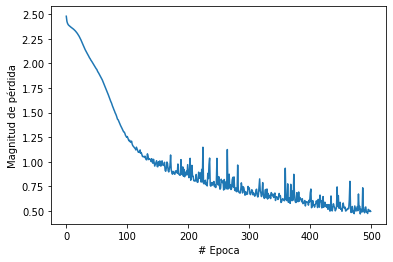

In [ ]:
#Ver la funcion de perdida
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])

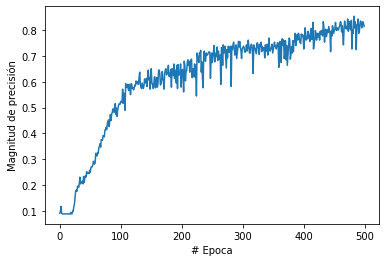

In [ ]:
#Ver la funcion de perdida
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de precisión")
plt.plot(history.history["accuracy"])

In [ ]:
print("Evaluate on test data")
results = modelo.evaluate(inputDataVal, outputDataVal, batch_size=30)
print("test loss, test acc:", results)
pesosEntrenado = modelo.get_weights

Evaluate on test data
1/1 [==============================] - 0s 107ms/step - loss: 0.9102 - accuracy: 0.7000
test loss, test acc: [0.9101950526237488, 0.699999988079071]


In [ ]:
x, y, z = genetico(arrayPesos,capas,classes,modelo)

Func fitness, imprimiendo por capa, x cant de individuos
[(0.20000000298023224, 14), (0.15000000596046448, 13), (0.10000000149011612, 0), (0.10000000149011612, 1), (0.10000000149011612, 2), (0.10000000149011612, 4), (0.10000000149011612, 7), (0.10000000149011612, 9), (0.10000000149011612, 11), (0.10000000149011612, 12), (0.10000000149011612, 15), (0.10000000149011612, 17), (0.10000000149011612, 19), (0.05000000074505806, 5), (0.05000000074505806, 6), (0.05000000074505806, 8), (0.05000000074505806, 10), (0.05000000074505806, 16), (0.0, 3), (0.0, 18)]
[2.523790121078491, 39.1524772644043, 34.03730010986328, 14.506753921508789, 52.81475067138672, 3.9741668701171875, 6.897146701812744, 6.509218692779541, 3.9097602367401123, 7.192746162414551, 23.605701446533203, 12.466041564941406, 3.20141339302063, 58.544921875, 7.327419281005859, 10.21788501739502, 10.321863174438477, 3.021878719329834, 2.762727737426758, 5.115401268005371]
Func fitness, imprimiendo por capa, x cant de individuos
[(0.200

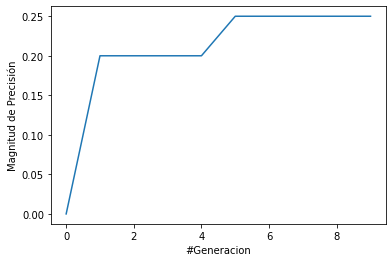

In [ ]:
#Ver la funcion de perdida
plt.xlabel("#Generacion")
plt.ylabel("Magnitud de Precisión")
plt.plot(y,x)

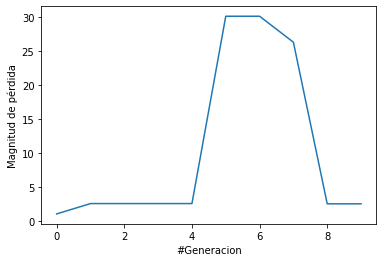

In [ ]:
#Ver la funcion de perdida
plt.xlabel("#Generacion")
plt.ylabel("Magnitud de pérdida")
plt.plot(y,z)